In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

In [23]:
df = pd.read_csv("C:/Users/ghom9/Downloads/healthcare-dataset-stroke-data.csv") # 데이터값이 칼람으로 올라오면 header = None
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [38]:
print(df.isna().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [40]:

# age결측치 평균값 확인하기

mean_age = df['bmi'].mean()
print(mean_age)
# age결측치 평균값으로 채우기 

df['bmi'] = df['bmi'].fillna(mean_age)
print(df.isna().sum())

28.893236911794666
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [31]:
#엔코딩 -> 문자 데이터를 숫자로 변환하는 과정 

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
print(df['ever_married'].value_counts()) 


ever_married
1    3353
0    1757
Name: count, dtype: int64


In [ ]:
#엔코딩 -> 문자 데이터를 숫자로 변환하는 과정 

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
print(df['gender'].value_counts()) 


In [35]:
#엔코딩 -> 문자 데이터를 숫자로 변환하는 과정 

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
print(df['Residence_type'].value_counts()) 


Residence_type
1    2596
0    2514
Name: count, dtype: int64


In [36]:
#엔코딩 -> 문자 데이터를 숫자로 변환하는 과정 

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['work_type'] = label_encoder.fit_transform(df['work_type'])
print(df['work_type'].value_counts()) 
smoking_status	

work_type
2    2925
3     819
4     687
0     657
1      22
Name: count, dtype: int64


In [37]:
#엔코딩 -> 문자 데이터를 숫자로 변환하는 과정 

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])
print(df['smoking_status'].value_counts()) 
	

smoking_status
2    1892
0    1544
1     885
3     789
Name: count, dtype: int64


In [25]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [41]:
X = df.drop('stroke', axis=1)
y = df['stroke']

In [42]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=0)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((4088, 11), (1022, 11), (4088,), (1022,))

In [47]:
import warnings
warnings.filterwarnings("ignore")

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(10, input_shape=(11,), activation='relu')) 
model.add(Dense(20, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 30)                  │             630 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,291 (5.04 KB)

 Trainable params: 1,291 (5.04 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split= 0.1)
y_pred = model.predict(X_test)

Epoch 1/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6076 - loss: 0.6885 - val_accuracy: 0.9462 - val_loss: 0.2581
Epoch 2/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9503 - loss: 0.2172 - val_accuracy: 0.9462 - val_loss: 0.2139
Epoch 3/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9566 - loss: 0.1657 - val_accuracy: 0.9462 - val_loss: 0.2024
Epoch 4/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9542 - loss: 0.1655 - val_accuracy: 0.9462 - val_loss: 0.1949
Epoch 5/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9535 - loss: 0.1597 - val_accuracy: 0.9462 - val_loss: 0.1881
Epoch 6/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9530 - loss: 0.1562 - val_accuracy: 0.9462 - val_loss: 0.1840
Epoch 7/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9523 - loss: 0.1576 - val_accuracy: 0.9462 - val_loss: 0.1846
Epoch 8/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9560 - loss: 0.1477 - val_accuracy: 0.

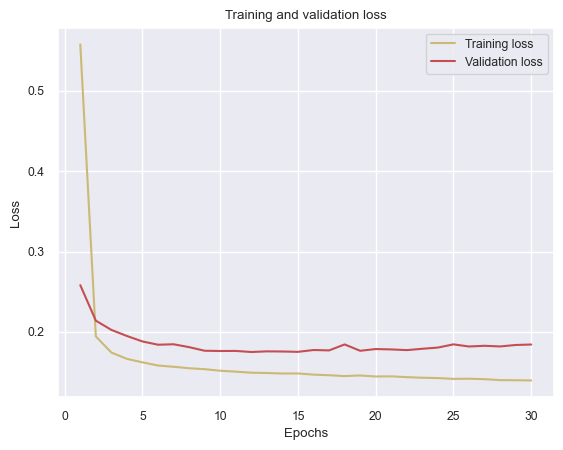

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [49]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9392 - loss: 0.5938 
Test Accuracy: 0.9472
